In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

from sklearn.model_selection import train_test_split

from src.plotting import *
from src.regression import RegressionAnalysis
from src.utils import polynomial_features, scale_data, runge

Method = ols, eta = 0.37, diverged (sustained increase)
Method = ols, eta = 0.365, converged at iteration 92
Method = ols, eta = 0.2, converged at iteration 244
Method = ols, eta = 0.1, converged at iteration 449
Method = ols, eta = 0.4, converged at iteration 114
Method = ols, eta = 0.3, converged at iteration 92
Method = ols, eta = 0.1, converged at iteration 70
Method = ols, eta = 0.05, converged at iteration 94
Method = ols, eta = 0.3, converged at iteration 162
Method = ols, eta = 0.25, converged at iteration 160
Method = ols, eta = 0.15, converged at iteration 169
Method = ols, eta = 0.1, converged at iteration 231
Method = ols, eta = 0.02, converged at iteration 135
Method = ols, eta = 0.01, converged at iteration 111
Method = ols, eta = 0.005, converged at iteration 184
Method = ols, eta = 0.001, converged at iteration 756
Method = ols, eta = 0.2, converged at iteration 99
Method = ols, eta = 0.1, converged at iteration 92
Method = ols, eta = 0.05, converged at iteration 86
Met

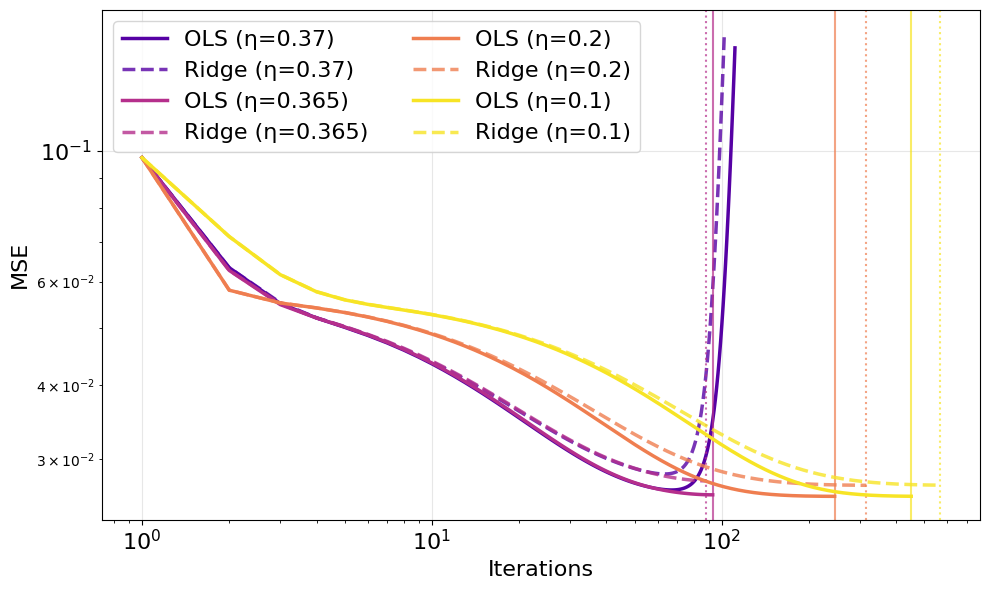


OLS RESULTS
  Method  Learning Rate  Iterations Final MSE Converged
      GD          0.370         111         -  Diverged
      GD          0.365          93  0.026051       Yes
      GD          0.200         245  0.025893       Yes
      GD          0.100         450  0.025901       Yes
Momentum          0.400         115  0.025886       Yes
Momentum          0.300          93  0.025887       Yes
Momentum          0.100          71  0.025890       Yes
Momentum          0.050          95  0.025890       Yes
 AdaGrad          0.300         163  0.025890       Yes
 AdaGrad          0.250         161  0.025890       Yes
 AdaGrad          0.150         170  0.025890       Yes
 AdaGrad          0.100         232  0.025893       Yes
 RMSprop          0.020         136  0.027134       Yes
 RMSprop          0.010         112  0.026289       Yes
 RMSprop          0.005         185  0.025995       Yes
 RMSprop          0.001         757  0.025892       Yes
    Adam          0.200          99

In [3]:
np.random.seed(42)


N = 500
degree = 5
lam = 1e-2
num_iters = 1500


x = np.linspace(-1, 1, N)
random_noise = np.random.normal(0, 0.1, N)
y_true = runge(x)
y_noise = y_true + random_noise
X = polynomial_features(x, degree)


X_train, X_test, y_train, y_test = train_test_split(
    X, y_noise, test_size=0.25, random_state=42
)
x_train = X_train[:, 0]
x_test = X_test[:, 0]
X_train_s, y_train_s, X_mean, X_std, y_mean = scale_data(X_train, y_train)
X_test_s, y_test_s, _, _, _ = scale_data(X_test, y_test, X_mean, X_std, y_mean)
data = [X_train_s, X_test_s, y_train_s, y_test_s, x_train, x_test, y_mean]


eta_list_gd_ols = [0.37, 0.365, 0.2, 0.1]
eta_list_momentum_ols = [0.4, 0.3, 0.1, 0.05]
eta_list_adagrad_ols = [0.3, 0.25, 0.15, 0.1]
eta_list_rmsprop_ols = [0.02, 0.01, 0.005, 0.001]
eta_list_adam_ols = [0.2, 0.1, 0.05, 0.02]

eta_list_gd_ridge = [0.37, 0.365, 0.2, 0.1]
eta_list_momentum_ridge = [0.22, 0.2, 0.15, 0.05]
eta_list_adagrad_ridge = [0.225, 0.22, 0.215, 0.15]
eta_list_rmsprop_ridge = [0.01, 0.005, 0.002, 0.001]
eta_list_adam_ridge = [0.25, 0.2, 0.1, 0.05]


# ============================================================================
#                       Setup for all optimizers
# ============================================================================


optimizers_ols = {
    "gd": eta_list_gd_ols,
    "momentum": eta_list_momentum_ols,
    "adagrad": eta_list_adagrad_ols,
    "rmsprop": eta_list_rmsprop_ols,
    "adam": eta_list_adam_ols,
}

optimizers_ridge = {
    "gd": eta_list_gd_ridge,
    "momentum": eta_list_momentum_ridge,
    "adagrad": eta_list_adagrad_ridge,
    "rmsprop": eta_list_rmsprop_ridge,
    "adam": eta_list_adam_ridge,
}


(
    mse_history_ols_gd,
    mse_history_ols_momentum,
    mse_history_ols_adagrad,
    mse_history_ols_rmsprop,
    mse_history_ols_adam,
) = [], [], [], [], []
(
    mse_history_ridge_gd,
    mse_history_ridge_momentum,
    mse_history_ridge_adagrad,
    mse_history_ridge_rmsprop,
    mse_history_ridge_adam,
) = [], [], [], [], []


# Run OLS with OLS-specific eta valuesx
for opt_name, eta_list in optimizers_ols.items():
    for eta in eta_list:
        analysis = RegressionAnalysis(
            data,
            degree=degree,
            lam=lam,
            eta=eta,
            num_iters=num_iters,
            full_dataset=False,
            tol_relative=1e-5,
        )
        analysis.fit(models=("ols",), opts=opt_name)

        # Store MSE histories for OLS
        if opt_name == "gd":
            mse_history_ols_gd.append(analysis.runs[("ols", opt_name)]["history"])
        elif opt_name == "momentum":
            mse_history_ols_momentum.append(analysis.runs[("ols", opt_name)]["history"])
        elif opt_name == "adagrad":
            mse_history_ols_adagrad.append(analysis.runs[("ols", opt_name)]["history"])
        elif opt_name == "rmsprop":
            mse_history_ols_rmsprop.append(analysis.runs[("ols", opt_name)]["history"])
        elif opt_name == "adam":
            mse_history_ols_adam.append(analysis.runs[("ols", opt_name)]["history"])

# Run Ridge with Ridge-specific eta values
for opt_name, eta_list in optimizers_ridge.items():
    for eta in eta_list:
        analysis = RegressionAnalysis(
            data,
            degree=degree,
            lam=lam,
            eta=eta,
            num_iters=num_iters,
            full_dataset=False,
            tol_relative=1e-5,
        )
        analysis.fit(models=("ridge",), opts=opt_name)

        # Store MSE histories for Ridge
        if opt_name == "gd":
            mse_history_ridge_gd.append(analysis.runs[("ridge", opt_name)]["history"])
        elif opt_name == "momentum":
            mse_history_ridge_momentum.append(
                analysis.runs[("ridge", opt_name)]["history"]
            )
        elif opt_name == "adagrad":
            mse_history_ridge_adagrad.append(
                analysis.runs[("ridge", opt_name)]["history"]
            )
        elif opt_name == "rmsprop":
            mse_history_ridge_rmsprop.append(
                analysis.runs[("ridge", opt_name)]["history"]
            )
        elif opt_name == "adam":
            mse_history_ridge_adam.append(analysis.runs[("ridge", opt_name)]["history"])


# ============================================================================
#                  Gradient descent: OLS vs RIDGE
# ============================================================================


fig, ax = plt.subplots(figsize=(10, 6))

n_etas = len(eta_list_gd_ols)
colors = cm.plasma(np.linspace(0.15, 0.95, n_etas))

for i, eta in enumerate(eta_list_gd_ols):
    ax.plot(
        range(1, len(mse_history_ols_gd[i]) + 1),
        mse_history_ols_gd[i],
        "-",
        color=colors[i],
        linewidth=2.5,
        label=f"OLS (η={eta})",
    )

    iterations_ols = len(mse_history_ols_gd[i])
    final_mse_ols = mse_history_ols_gd[i][-1]
    initial_mse_ols = mse_history_ols_gd[i][0]
    if final_mse_ols < initial_mse_ols:
        ax.axvline(iterations_ols, color=colors[i], linewidth=1.5, alpha=0.7)

    ax.plot(
        range(1, len(mse_history_ridge_gd[i]) + 1),
        mse_history_ridge_gd[i],
        "--",
        color=colors[i],
        linewidth=2.5,
        label=f"Ridge (η={eta})",
        alpha=0.8,
    )

    iterations_ridge = len(mse_history_ridge_gd[i])
    final_mse_ridge = mse_history_ridge_gd[i][-1]
    initial_mse_ridge = mse_history_ridge_gd[i][0]
    if final_mse_ridge < initial_mse_ridge:
        ax.axvline(
            iterations_ridge, color=colors[i], linestyle=":", linewidth=1.5, alpha=0.7
        )

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Iterations", fontsize=16)
ax.set_ylabel("MSE", fontsize=16)
ax.grid(True, alpha=0.3)
ax.tick_params(labelsize=16)
ax.legend(fontsize=16, loc="best", ncol=2)

plt.tight_layout()
plt.savefig("figs/gd_ols_vs_ridge.pdf", dpi=300, bbox_inches="tight")
plt.show()


# ============================================================================
#                 Comparing all gd methods: OLS and RIDGE
# ============================================================================

methods_data = [
    (
        "GD",
        eta_list_gd_ols,
        eta_list_gd_ridge,
        mse_history_ols_gd,
        mse_history_ridge_gd,
    ),
    (
        "Momentum",
        eta_list_momentum_ols,
        eta_list_momentum_ridge,
        mse_history_ols_momentum,
        mse_history_ridge_momentum,
    ),
    (
        "AdaGrad",
        eta_list_adagrad_ols,
        eta_list_adagrad_ridge,
        mse_history_ols_adagrad,
        mse_history_ridge_adagrad,
    ),
    (
        "RMSprop",
        eta_list_rmsprop_ols,
        eta_list_rmsprop_ridge,
        mse_history_ols_rmsprop,
        mse_history_ridge_rmsprop,
    ),
    (
        "Adam",
        eta_list_adam_ols,
        eta_list_adam_ridge,
        mse_history_ols_adam,
        mse_history_ridge_adam,
    ),
]


# ----- OLS -----
ols_data = []
for method_name, etas_ols, etas_ridge, hist_ols, hist_ridge in methods_data:
    for i, eta in enumerate(etas_ols):
        iterations = len(hist_ols[i])
        final_mse = hist_ols[i][-1]
        initial_mse = hist_ols[i][0]

        if final_mse > initial_mse:
            converged = "Diverged"
            final_mse_display = "-"
        elif len(hist_ols[i]) == num_iters:
            converged = "No"
            final_mse_display = f"{final_mse:.6f}"
        else:
            converged = "Yes"
            final_mse_display = f"{final_mse:.6f}"

        ols_data.append(
            {
                "Method": method_name,
                "Learning Rate": eta,
                "Iterations": iterations,
                "Final MSE": final_mse_display,
                "Converged": converged,
            }
        )

df_ols = pd.DataFrame(ols_data)


# ----- RIDGE -----
ridge_data = []
for method_name, etas_ols, etas_ridge, hist_ols, hist_ridge in methods_data:
    for i, eta in enumerate(etas_ridge):
        iterations = len(hist_ridge[i])
        final_mse = hist_ridge[i][-1]
        initial_mse = hist_ridge[i][0]

        if final_mse > initial_mse:
            converged = "Diverged"
            final_mse_display = "-"
        elif len(hist_ridge[i]) == num_iters:
            converged = "No"
            final_mse_display = f"{final_mse:.6f}"
        else:
            converged = "Yes"
            final_mse_display = f"{final_mse:.6f}"

        ridge_data.append(
            {
                "Method": method_name,
                "Learning Rate": eta,
                "Iterations": iterations,
                "Final MSE": final_mse_display,
                "Converged": converged,
            }
        )

df_ridge = pd.DataFrame(ridge_data)


print_dataframe(df_ols, "OLS RESULTS", "=")
print_dataframe(df_ridge, "RIDGE RESULTS", "=")


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.model_selection import train_test_split

from src.plotting import *
from src.regression import RegressionAnalysis
from src.utils import polynomial_features, scale_data, runge

np.random.seed(42)

# =============================================================================
#                                 SETUP
# =============================================================================

N = 1_000_000
degree = 5
lam = 1e-2
n_epochs = 40
num_iters = 500

# Generate data
x = np.linspace(-1, 1, N)
random_noise = np.random.normal(0, 0.1, N)
y_true = runge(x)
y_noise = y_true + random_noise
X = polynomial_features(x, degree)

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y_noise, test_size=0.25, random_state=42
)
x_train = X_train[:, 0]
x_test = X_test[:, 0]
X_train_s, y_train_s, X_mean, X_std, y_mean = scale_data(X_train, y_train)
X_test_s, y_test_s, _, _, _ = scale_data(X_test, y_test, X_mean, X_std, y_mean)
data = [X_train_s, X_test_s, y_train_s, y_test_s, x_train, x_test, y_mean]

# =============================================================================
#                    LEARNING RATES
# =============================================================================

learning_rates = {
    'gd': 0.36,
    'momentum': 0.1, 
    'adagrad': 0.25,
    'rmsprop': 0.01,
    'adam': 0.05,

    'sgd': 0.005,             
    'sgd_momentum': 0.001,   
    'sgd_adagrad': 0.01,    
    'sgd_rmsprop': 0.0005, 
    'sgd_adam': 0.0001
}

batch_sizes = [256]

# =============================================================================
#                    RUN COMPARISONS FOR ALL MODELS
# =============================================================================

results = []

print("\n" + "="*80)
print("COMPARING FULL-BATCH vs MINI-BATCH SGD")
print("="*80)

# Loop over all three models
for model in ['ols', 'ridge', 'lasso']:
    print(f"\n{'='*60}")
    print(f"Model: {model.upper()}")
    print('='*60)
    
    # ------ FULL-BATCH METHODS ------
    for opt in ['gd', 'momentum', 'adagrad', 'rmsprop', 'adam']:
        print(f"\n  Full {opt.upper()}:")
        
        start_time = time.time()
        
        analysis = RegressionAnalysis(
            data,
            degree=degree,
            lam=lam,
            eta=learning_rates[opt],
            num_iters=num_iters,
            full_dataset=False,
            tol_relative=1e-5
        )
        
        analysis.fit(models=(model,), opts=opt)
        
        elapsed_time = time.time() - start_time
        
        # Extract results
        run_key = (model, opt)
        history = analysis.runs[run_key]['history']
        iterations = len(history)
        final_mse = history[-1]
        initial_mse = history[0]
        
        # Determine convergence status
        if final_mse > initial_mse:
            converged = 'Diverged'
            final_mse_display = '-'
        elif iterations == num_iters:
            converged = 'No'
            final_mse_display = f'{final_mse:.6f}'
        else:
            converged = 'Yes'
            final_mse_display = f'{final_mse:.6f}'
        
        results.append({
            'Model': model.upper(),
            'Method': opt.upper(),
            'Batch_Type': 'Full-Batch',
            'Batch_Size': len(X_train_s),
            'Epochs/Iters': iterations,
            'Time_Seconds': elapsed_time,
            'Final_MSE': final_mse_display,
            'Converged': converged,
            'MSE_History': history
        })
        
        print(f"    Time: {elapsed_time:.2f}s, Iters: {iterations}, "
              f"Status: {converged}, Final MSE: {final_mse_display}")

    # ------ MINI-BATCH SGD METHODS ------
    for opt in ['sgd', 'sgd_momentum', 'sgd_adagrad', 'sgd_rmsprop', 'sgd_adam']:
        base_opt = opt.replace('sgd_', '').replace('sgd', 'gd')
        
        for batch_size in batch_sizes:
            print(f"\n  Mini {opt.upper()} (batch={batch_size}):")
            
            start_time = time.time()
            
            analysis = RegressionAnalysis(
                data,
                degree=degree,
                lam=lam,
                eta=learning_rates[opt],
                num_iters=None,
                n_epochs=n_epochs,
                batch_size=batch_size,
                full_dataset=False,
                tol_relative=1e-5
            )
            
            analysis.fit(models=(model,), opts=opt)
            
            elapsed_time = time.time() - start_time
            
            run_key = (model, opt)
            history = analysis.runs[run_key]['history']
            epochs = len(history)
            final_mse = history[-1]
            initial_mse = history[0]
            
            if final_mse > initial_mse:
                converged = 'Diverged'
                final_mse_display = '-'
            elif epochs == n_epochs:
                converged = 'No'
                final_mse_display = f'{final_mse:.6f}'
            else:
                converged = 'Yes'
                final_mse_display = f'{final_mse:.6f}'
            
            results.append({
                'Model': model.upper(),
                'Method': opt.upper(),
                'Batch_Type': 'Mini-Batch',
                'Batch_Size': batch_size,
                'Epochs/Iters': epochs,
                'Time_Seconds': elapsed_time,
                'Final_MSE': final_mse_display,
                'Converged': converged,
                'MSE_History': history
            })
            
            print(f"    Time: {elapsed_time:.2f}s, Epochs: {epochs}, "
                  f"Status: {converged}, Final MSE: {final_mse_display}")

df_results = pd.DataFrame(results)

# =============================================================================
#                          RESULTS
# =============================================================================

print("\n\n" + "="*80)
print("SUMMARY: TIME TO CONVERGENCE - ALL MODELS")
print("="*80)

for model in ['OLS', 'RIDGE', 'LASSO']:
    print(f"\n{model}:")
    print("-"*80)
    df_model = df_results[df_results['Model'] == model].copy()
    
    summary = df_model[['Method', 'Batch_Type', 'Batch_Size', 
                        'Time_Seconds', 'Epochs/Iters', 'Converged', 'Final_MSE']].copy()
    summary['Time_Seconds'] = summary['Time_Seconds'].apply(lambda x: f"{x:.2f}")
    
    print(summary.to_string(index=False))


COMPARING FULL-BATCH vs MINI-BATCH SGD

Model: OLS

  Full GD:
Method = ols, eta = 0.36, converged at iteration 128
    Time: 0.55s, Iters: 129, Status: Yes, Final MSE: 0.026848

  Full MOMENTUM:
Method = ols, eta = 0.1, converged at iteration 70
    Time: 0.32s, Iters: 71, Status: Yes, Final MSE: 0.026827

  Full ADAGRAD:
Method = ols, eta = 0.25, converged at iteration 162
    Time: 0.68s, Iters: 163, Status: Yes, Final MSE: 0.026829

  Full RMSPROP:
Method = ols, eta = 0.01, converged at iteration 110
    Time: 0.50s, Iters: 111, Status: Yes, Final MSE: 0.027161

  Full ADAM:
Method = ols, eta = 0.05, converged at iteration 92
    Time: 0.37s, Iters: 92, Status: Yes, Final MSE: 0.026835

  Mini SGD (batch=256):
Method = ols, eta = 0.005, converged at epoch 10
    Time: 0.55s, Epochs: 11, Status: Yes, Final MSE: 0.026825

  Mini SGD_MOMENTUM (batch=256):
Method = Gradient Descent, eta = 0.001, converged at epoch 6
    Time: 0.35s, Epochs: 7, Status: Yes, Final MSE: 0.026827

  Mini 